In [1]:
import glob
import os
import numpy as np
import matplotlib
from scipy.fftpack import fft
from scipy.fft import fft, rfft
from scipy.io import wavfile 
import IPython.display as ipd
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
from scipy.stats import multivariate_normal

import librosa
import librosa.display
from sklearn.cluster import KMeans

import math
from glob import glob

In [2]:

shift_time=10   #10ms
window_time=25    #25ms
music_sr=[]



In [3]:
# Read the data
def read_data(dir):
     
    audio_files = glob(dir+'/*.wav')
    samplerate, data = wavfile.read(audio_files[0])
    sh=int(samplerate*shift_time*0.001)
    No_of_shift = len(range(0,len(data),sh))
    window_length=int(samplerate*window_time*0.001)
    final_data=np.zeros((len(audio_files),No_of_shift-3,window_length))
    for file in range(len(audio_files)):
        
        samplerate, data = wavfile.read(audio_files[file])
        window_length=int(samplerate*window_time*0.001)
        sh=int(samplerate*shift_time*0.001)  #160
        No_of_shift = len(range(0,len(data),sh))
        
        #print("the value of sh",sh)
                 #3000

        #print(len(data))
        #print("the no of shifts are ",No_of_shift)
        hamming_output=np.hamming(window_length)
        j=0
        for i in range(No_of_shift-3):
            if(len(data[j:])>=window_length):
                final_data[file][i][:]=(data[j:j+window_length] *hamming_output)
            else:
                break
            j=j+sh
    return final_data

In [8]:
# Take the data convert into spectrogram
def specto(mag_fft,final_data):
    audio_files = glob(data_dir+'/*.wav')
    fft_data=np.zeros([len(audio_files)*(No_of_shift-3),32])
    k=0
    for file in range(0, len(audio_files),1):
        fft=np.log(np.absolute(np.fft.fft(final_data[file],mag_fft)))
        newfft=np.zeros([No_of_shift-3,32])
        newfft=fft[:,0:32]
 
        for i in range(No_of_shift-3):
            fft_data[k,:]=newfft[i,:]
            k=k+1
    return fft_data

In [7]:
#plotting the spectrogram
def plot_spec(data):
    plt.figure(figsize=(14,7))
    plt.imshow((data.T))
    plt.show()

In [34]:
#Returning a covariance matrix
def cov_mat(fft_data):
    print(len(fft_data))
    cov_mat=np.matmul(fft_data.T,fft_data)
    cov_mat=cov_mat/len(fft_data-1)
    return cov_mat

In [4]:
data_dir = 'train/music'
audio_files = glob(data_dir+'/*.wav')
samplerate, data = wavfile.read(audio_files[0])
sh=int(samplerate*shift_time*0.001)
No_of_shift = len(range(0,len(data),sh))
window_length=int(samplerate*window_time*0.001)

In [5]:
music_data=read_data(data_dir)                #[40][2997][400]
data_dir = 'train/speech'
speech_data=read_data(data_dir)

In [6]:
np.shape(speech_data)

(40, 2997, 400)

In [9]:
mag_fft=64


#print(equal_arrays)
fft_music=specto(mag_fft,music_data)
fft_speech=specto(mag_fft,speech_data)
print(np.shape(fft_music))
print(np.shape(fft_speech))
fft_data=np.concatenate((fft_music, fft_speech), axis=0)
#print(np.shape(fft_data))

(119880, 32)
(119880, 32)


In [10]:
#implemented the K-Means Clustering 

import random
X=fft_music
m=len(X)
n=len(X[0])
print(m,n)
n_iter=1
K=2

center=np.array([]).reshape(n,0)
center.shape

for i in range(K):
    rand=random.randint(0,m-1)
    center=np.c_[center,X[rand]]
    
output_music={}

for i in range(n_iter):
    EuclidDist=np.array([]).reshape(m,0)
    for k in range(K):
        tempDist=np.sum((X-center[:,k])**2,axis=1)
        EuclidDist=np.c_[EuclidDist,tempDist]
    C=np.argmin(EuclidDist,axis=1)+1

#     print(np.shape(C))
    ans=[0]*(len(fft_music))
    Y={}
    for k in range(K):
        Y[k+1]=np.array([]).reshape(n,0)
    
    for i in range(m):
        Y[C[i]]=np.c_[Y[C[i]],X[i]]

    for k in range(K):
        Y[k+1]=Y[k+1].T

    for k in range(K):
         center[:,k]=np.mean(Y[k+1],axis=0)
    output_music=Y  
mean_music=center.T

119880 32


In [11]:
import random
X=fft_speech
m=len(X)
n=len(X[0])
print(m,n)
n_iter=1
K=2

center=np.array([]).reshape(n,0)
center.shape

for i in range(K):
    rand=random.randint(0,m-1)
    center=np.c_[center,X[rand]]
    
output_speech={}

for i in range(n_iter):
    EuclidDist=np.array([]).reshape(m,0)
    for k in range(K):
        tempDist=np.sum((X-center[:,k])**2,axis=1)
        EuclidDist=np.c_[EuclidDist,tempDist]
    C=np.argmin(EuclidDist,axis=1)+1

#     print(np.shape(C))
    ans=[0]*(len(fft_music))
    Y={}
    for k in range(K):
        Y[k+1]=np.array([]).reshape(n,0)
    
    for i in range(m):
        Y[C[i]]=np.c_[Y[C[i]],X[i]]

    for k in range(K):
        Y[k+1]=Y[k+1].T

    for k in range(K):
         center[:,k]=np.mean(Y[k+1],axis=0)
    output_speech=Y  
mean_speech=center.T
count=0

119880 32


In [29]:
len(output_music[2])

45482

In [12]:
# Label the data to know which data belongs to which cluster
X=fft_music
label_music=[1]*len(X)
for i in range(len(X)):
    if(X[i] in output_music[2]):
        label_music[i]=2
    


In [30]:
count =0
for i in label_music:
    if i==2:
        count=count+1
count

45482

In [31]:
X=fft_speech
label_speech=[1]*len(X)
for i in range(len(X)):
    if(X[i] in output_speech[2]):
        label_speech[i]=2

In [73]:
X=fft_music
music_Data1=[]
music_Data2=[]
for i in range(len(label_music)):
    if(label_music[i]==1):
        music_Data1.append(X[i])
    else:
        music_Data2.append(X[i])
    
music_Data1=np.array(music_Data1)
music_Data2=np.array(music_Data2)

musicmeanVectors=mean_music
covariance_music=[]
covariance_music.append(np.diag(np.diag(cov_mat(music_Data1))))
covariance_music.append(np.diag(np.diag(cov_mat(music_Data2))))
covariance_music=np.array(covariance_music)
pi_music=[]
pi_music.append(len(music_Data1)/len(X))
pi_music.append(len(music_Data2)/len(X))


74398
45482


In [74]:
X=fft_speech
speech_Data1=[]
speech_Data2=[]

for i in range(len(label_speech)):
    if(label_speech[i]==1):
        speech_Data1.append(X[i])
    else:
        speech_Data2.append(X[i])
speech_Data1=np.array(speech_Data1)
speech_Data2=np.array(speech_Data2)

speechmeanVectors=mean_speech
covariance_speech=[]



covariance_speech.append(np.diag(np.diag(cov_mat(speech_Data1))))
covariance_speech.append(np.diag(np.diag(cov_mat(speech_Data2))))

covariance_speech=np.array(covariance_speech)
pi_speech=[]
pi_speech.append(len(speech_Data1)/len(X))
pi_speech.append(len(speech_Data2)/len(X))


13394
106486


In [75]:
def multivariate(X, mean_vector, covariance_matrix):
    return (2*np.pi)**(-len(X)/2)*np.linalg.det(covariance_matrix)**(-1/2)*np.exp(-np.dot(np.dot((X-mean_vector).T, np.linalg.inv(covariance_matrix)), (X-mean_vector))/2)

In [76]:
def specto_test(mag_fft,final_data):
    fft_data=np.zeros([(No_of_shift-3),32]) 
    fft=np.log(np.absolute(np.fft.fft(final_data,mag_fft)))
    fft_data=fft[:,0:32]
    
    return fft_data

In [77]:
data_dir = 'test'
test_data=read_data(data_dir)
fft_test=specto_test(mag_fft,test_data[1])
print(np.shape(fft_test))

(2997, 32)


In [78]:
def compute_logLikelihood(X,pi,meanVectors,covariance,no):
    logdata=0
    for n in range(len(X)):
        data=0
        for j in range(no):
            data+=pi[j]*multivariate(X[n], meanVectors[j], covariance[j])
        logdata+=np.log(data)
    return logdata

In [79]:
no=2
like_mean=[compute_logLikelihood(X,pi_music,musicmeanVectors,covariance_music,no)]
like_speech=[compute_logLikelihood(X,pi_speech,speechmeanVectors,covariance_speech,no)]

E step

    

In [80]:
c=0
while True:
    no=2
    c=c+1
    if(c==3):
        break
    z_music=np.zeros((len(fft_music), no))
    z_speech=np.zeros((len(fft_speech), no))
    ############################ E step ###########################
    for n in range(len(fft_music)):
            for k in range(no):
                z_music[n][k] = pi_music[k] * multivariate(fft_music[n], musicmeanVectors[k], covariance_music[k])
                z_music[n][k] /= sum([pi_music[j]*multivariate(fft_music[n], musicmeanVectors[j], covariance_music[j]) for j in range(no)])
    for n in range(len(fft_speech)):
            for k in range(no):
                z_speech[n][k] = pi_speech[k] * multivariate(fft_speech[n], speechmeanVectors[k], covariance_speech[k])
                z_speech[n][k] /= sum([pi_speech[j]*multivariate(fft_speech[n], speechmeanVectors[j], covariance_speech[j]) for j in range(no)])
    N_speech=np.sum(z_speech,axis=0)
    N_music=np.sum(z_music,axis=0)
    
    ####################################### M step ################################
    
    #musicmeanVectors=np.zeros([no,len(fft_music[0])])
    #speechmeanvectors=np.zeros([no,len(fft_speech[0])])
    for k in range(no):
        for n in range(len(fft_music)):
            musicmeanVectors[k] += z_music[n][k] * fft_music[n] 
        musicmeanVectors[k] = (1/N_music[k])*musicmeanVectors[k]
    for k in range(no):
        for n in range(len(fft_speech)):
            speechmeanVectors[k] += z_speech[n][k] * fft_speech[n] 
        speechmeanVectors[k] = (1/N_speech[k])*speechmeanVectors[k] 
        
        
    
    for k in range(no):

        new_X=(fft_music-musicmeanVectors[k]).T

        covariance_music[k]=np.diag(np.diag(np.dot(z_music[:,k]*new_X,new_X.T)))
        covariance_music[k] = 1/N_music[k]*covariance_music[k] 
        

    for k in range(no):
        new_X_speech=(fft_speech-speechmeanVectors[k]).T
        covariance_speech[k]=np.diag(np.diag(np.dot(z_speech[:,k]*new_X_speech,new_X_speech.T)))
        covariance_speech[k] = 1/N_speech[k]*covariance_speech[k] 
        
        
        
    for i in range(no):
        pi_music[i]=(N_music[i]/len(fft_music))
    for i in range(no):
        pi_speech[i]=(N_speech[i]/len(fft_speech))
        
    l1=compute_logLikelihood(fft_music,pi_music,musicmeanVectors,covariance_music,no)
    like_mean.append(l1)
    l2=compute_logLikelihood(fft_speech,pi_speech,speechmeanVectors,covariance_speech,no)
    like_speech.append(l2)
   

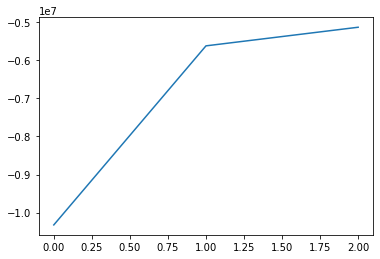

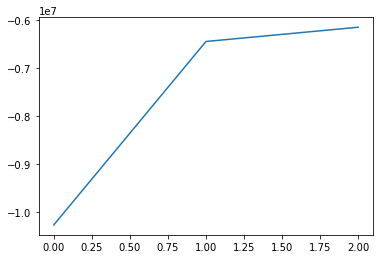

In [81]:

# Plot the likehood at the Em iterations first one is for music and second one is speech
plt.plot(like_mean)
plt.show()
plt.plot(like_speech)
plt.show()

In [82]:
no=2

count=0
for i in range(len(test_data)):
    
    
        fft_test=specto_test(mag_fft,test_data[i])
        
        lgmusic=compute_logLikelihood(fft_test,pi_music,musicmeanVectors,covariance_music,no)
        lgspeech=compute_logLikelihood(fft_test,pi_speech,speechmeanVectors,covariance_speech,no)
        
        if(lgmusic>lgspeech):
            if(i<=23):
                count=count+1
            
        else:
            if(i>=24):
                count=count+1
            


In [162]:

error=1-(count/48)
print("The Error is ",error)

The Error is  0.1875


Fully Covariance Matrix

In [84]:
X=fft_music
music_Data1=[]
music_Data2=[]

for i in range(len(label_music)):
    if(label_music[i]==1):
        music_Data1.append(X[i])
    else:
        music_Data2.append(X[i])
music_Data1=np.array(music_Data1)
music_Data2=np.array(music_Data2)

musicmeanVectors=mean_music
covariance_music=[]



covariance_music.append(cov_mat(music_Data1))
covariance_music.append(cov_mat(music_Data2))


covariance_music=np.array(covariance_music)
pi_music=[]
pi_music.append(len(music_Data1)/len(X))
pi_music.append(len(music_Data2)/len(X))



74398
45482


In [85]:
X=fft_speech
speech_Data1=[]
speech_Data2=[]

for i in range(len(label_speech)):
    if(label_speech[i]==1):
        speech_Data1.append(X[i])
    else:
        speech_Data2.append(X[i])
speech_Data1=np.array(speech_Data1)
speech_Data2=np.array(speech_Data2)

speechmeanVectors=mean_speech
covariance_speech=[]



covariance_speech.append(cov_mat(speech_Data1))
covariance_speech.append(cov_mat(speech_Data2))

covariance_speech=np.array(covariance_speech)
pi_speech=[]
pi_speech.append(len(speech_Data1)/len(X))
pi_speech.append(len(speech_Data2)/len(X))


13394
106486


In [88]:
no=2
like_music=[compute_logLikelihood(X,pi_music,musicmeanVectors,covariance_music,no)]
like_speech=[compute_logLikelihood(X,pi_speech,speechmeanVectors,covariance_speech,no)]


In [89]:
c=0
while True:
    no=2
    c=c+1
    if(c==3):
        break
    z_music=np.zeros((len(fft_music), no))
    z_speech=np.zeros((len(fft_speech), no))
    ############################ E step ###########################
    for n in range(len(fft_music)):
            for k in range(no):
                z_music[n][k] = pi_music[k] * multivariate(fft_music[n], musicmeanVectors[k], covariance_music[k])
                z_music[n][k] /= sum([pi_music[j]*multivariate(fft_music[n], musicmeanVectors[j], covariance_music[j]) for j in range(no)])
    for n in range(len(fft_speech)):
            for k in range(no):
                z_speech[n][k] = pi_speech[k] * multivariate(fft_speech[n], speechmeanVectors[k], covariance_speech[k])
                z_speech[n][k] /= sum([pi_speech[j]*multivariate(fft_speech[n], speechmeanVectors[j], covariance_speech[j]) for j in range(no)])
    N_speech=np.sum(z_speech,axis=0)
    N_music=np.sum(z_music,axis=0)
    
    ####################################### M step ################################
    
    #musicmeanVectors=np.zeros([no,len(fft_music[0])])
    #speechmeanvectors=np.zeros([no,len(fft_speech[0])])
    for k in range(no):
        for n in range(len(fft_music)):
            musicmeanVectors[k] += z_music[n][k] * fft_music[n] 
        musicmeanVectors[k] = (1/N_music[k])*musicmeanVectors[k]
    for k in range(no):
        for n in range(len(fft_speech)):
            speechmeanVectors[k] += z_speech[n][k] * fft_speech[n] 
        speechmeanVectors[k] = (1/N_speech[k])*speechmeanVectors[k] 
        
        
    
    for k in range(no):

        new_X=(fft_music-musicmeanVectors[k]).T

        covariance_music[k]=np.dot(z_music[:,k]*new_X,new_X.T)
        covariance_music[k] = 1/N_music[k]*covariance_music[k] 
        

    for k in range(no):
        new_X_speech=(fft_speech-speechmeanVectors[k]).T
        covariance_speech[k]=np.dot(z_speech[:,k]*new_X_speech,new_X_speech.T)
        covariance_speech[k] = 1/N_speech[k]*covariance_speech[k] 
        
        
        
    for i in range(no):
        pi_music[i]=(N_music[i]/len(fft_music))
    for i in range(no):
        pi_speech[i]=(N_speech[i]/len(fft_speech))
        
    l1=compute_logLikelihood(fft_music,pi_music,musicmeanVectors,covariance_music,no)
    like_music.append(l1)
    l2=compute_logLikelihood(fft_speech,pi_speech,speechmeanVectors,covariance_speech,no)
    like_speech.append(l2)
   

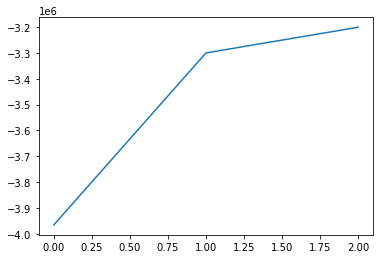

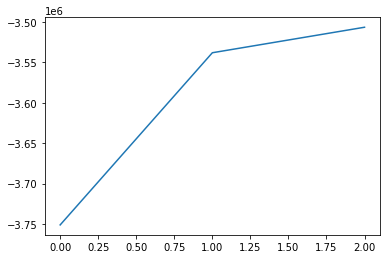

In [90]:
plt.plot(like_music)
plt.show()
plt.plot(like_speech)
plt.show()

In [91]:
no=2

count=0
for i in range(len(test_data)):
    
    
        fft_test=specto_test(mag_fft,test_data[i])
        
        lgmusic=compute_logLikelihood(fft_test,pi_music,musicmeanVectors,covariance_music,no)
        lgspeech=compute_logLikelihood(fft_test,pi_speech,speechmeanVectors,covariance_speech,no)
        
        if(lgmusic>lgspeech):
            if(i<=23):
                count=count+1
            
            
        else:
            if(i>=24):
                count=count+1
            
print(count/48)

0.9791666666666666


In [92]:
print("the Error is ",(1-(count/48)))

the Error is  0.02083333333333337


5 mixtures

In [93]:
import random
X=fft_music
m=len(X)
n=len(X[0])
print(m,n)
n_iter=1
K=5

center=np.array([]).reshape(n,0)
center.shape

for i in range(K):
    rand=random.randint(0,m-1)
    center=np.c_[center,X[rand]]
    
output_music={}

for i in range(n_iter):
    EuclidDist=np.array([]).reshape(m,0)
    for k in range(K):
        tempDist=np.sum((X-center[:,k])**2,axis=1)
        EuclidDist=np.c_[EuclidDist,tempDist]
    C=np.argmin(EuclidDist,axis=1)+1

#     print(np.shape(C))
    ans=[0]*(len(fft_music))
    Y={}
    for k in range(K):
        Y[k+1]=np.array([]).reshape(n,0)
    
    for i in range(m):
        Y[C[i]]=np.c_[Y[C[i]],X[i]]

    for k in range(K):
        Y[k+1]=Y[k+1].T

    for k in range(K):
         center[:,k]=np.mean(Y[k+1],axis=0)
    output_music=Y  
mean_music=center.T



119880 32


In [94]:
import random
X=fft_speech
m=len(X)
n=len(X[0])
print(m,n)
n_iter=1
K=5

center=np.array([]).reshape(n,0)
center.shape

for i in range(K):
    rand=random.randint(0,m-1)
    center=np.c_[center,X[rand]]
    
output_speech={}

for i in range(n_iter):
    EuclidDist=np.array([]).reshape(m,0)
    for k in range(K):
        tempDist=np.sum((X-center[:,k])**2,axis=1)
        EuclidDist=np.c_[EuclidDist,tempDist]
    C=np.argmin(EuclidDist,axis=1)+1

#     print(np.shape(C))
    ans=[0]*(len(fft_music))
    Y={}
    for k in range(K):
        Y[k+1]=np.array([]).reshape(n,0)
    
    for i in range(m):
        Y[C[i]]=np.c_[Y[C[i]],X[i]]

    for k in range(K):
        Y[k+1]=Y[k+1].T

    for k in range(K):
         center[:,k]=np.mean(Y[k+1],axis=0)
    output_speech=Y  
mean_speech=center.T
count=0



119880 32


In [132]:
count=0
X=fft_music
label_music=[1]*len(X)
for i in range(len(X)):
    if(X[i] in output_music[2]):
        count+=1
        label_music[i]=2
    elif(X[i] in output_music[3]):
        label_music[i]=3
    elif(X[i] in output_music[4]):
        label_music[i]=4
    elif(X[i] in output_music[5]):
        label_music[i]=5


In [ ]:
X=fft_speech
label_speech=[1]*len(X)
for i in range(len(X)):
    if(X[i] in output_speech[2]):
        label_speech[i]=2
    elif(X[i] in output_speech[3]):
        label_speech[i]=3
    elif(X[i] in output_speech[4]):
        label_speech[i]=4
    elif(X[i] in output_speech[5]):
        label_speech[i]=5

In [110]:
X=fft_music
music_Data1=[]
music_Data2=[]
music_Data3=[]
music_Data4=[]
music_Data5=[]
for i in range(len(label_music)):
    if(label_music[i]==1):
        music_Data1.append(X[i])
    elif(label_music[i]==2):
        music_Data2.append(X[i])
    elif(label_music[i]==3):
        music_Data3.append(X[i])
    elif(label_music[i]==4):
        music_Data4.append(X[i])
    else:
        music_Data5.append(X[i])
music_Data1=np.array(music_Data1)
music_Data2=np.array(music_Data2)
music_Data3=np.array(music_Data3)
music_Data4=np.array(music_Data4)
music_Data5=np.array(music_Data5)
musicmeanVectors=mean_music
covariance_music=[]



covariance_music.append(cov_mat(music_Data1))
covariance_music.append(cov_mat(music_Data2))

covariance_music.append(cov_mat(music_Data3))
covariance_music.append(cov_mat(music_Data4))
covariance_music.append(cov_mat(music_Data5))
covariance_music=np.array(covariance_music)
pi_music=[]
pi_music.append(len(music_Data1)/len(X))
pi_music.append(len(music_Data2)/len(X))
pi_music.append(len(music_Data3)/len(X))
pi_music.append(len(music_Data4)/len(X))
pi_music.append(len(music_Data5)/len(X))


38212
18223
34347
7355
21743


In [111]:
X=fft_speech
speech_Data1=[]
speech_Data2=[]
speech_Data3=[]
speech_Data4=[]
speech_Data5=[]
for i in range(len(label_speech)):
    if(label_speech[i]==1):
        speech_Data1.append(X[i])
    elif(label_speech[i]==2):
        speech_Data2.append(X[i])
    elif(label_speech[i]==3):
        speech_Data3.append(X[i])
    elif(label_speech[i]==4):
        speech_Data4.append(X[i])
    else:
        speech_Data5.append(X[i])
speech_Data1=np.array(speech_Data1)
speech_Data2=np.array(speech_Data2)
speech_Data3=np.array(speech_Data3)
speech_Data4=np.array(speech_Data4)
speech_Data5=np.array(speech_Data5)
speechmeanVectors=mean_speech
covariance_speech=[]



covariance_speech.append(cov_mat(speech_Data1))
covariance_speech.append(cov_mat(speech_Data2))

covariance_speech.append(cov_mat(speech_Data3))
covariance_speech.append(cov_mat(speech_Data4))
covariance_speech.append(cov_mat(speech_Data5))
covariance_speech=np.array(covariance_speech)
pi_speech=[]
pi_speech.append(len(speech_Data1)/len(X))
pi_speech.append(len(speech_Data2)/len(X))
pi_speech.append(len(speech_Data3)/len(X))
pi_speech.append(len(speech_Data4)/len(X))
pi_speech.append(len(speech_Data5)/len(X))


8589
6407
36858
26438
41588


In [107]:
no=5
like_music=[compute_logLikelihood(fft_music,pi_music,musicmeanVectors,covariance_music,no)]
like_speech=[compute_logLikelihood(fft_speech,pi_speech,speechmeanVectors,covariance_speech,no)]

In [112]:
c=0
while True:
    no=5
    c=c+1
    if(c==2):
        break
    z_music=np.zeros((len(fft_music), no))
    z_speech=np.zeros((len(fft_speech), no))
    ############################ E step ###########################
    for n in range(len(fft_music)):
            for k in range(no):
                z_music[n][k] = pi_music[k] * multivariate(fft_music[n], musicmeanVectors[k], covariance_music[k])
                z_music[n][k] /= sum([pi_music[j]*multivariate(fft_music[n], musicmeanVectors[j], covariance_music[j]) for j in range(no)])
    for n in range(len(fft_speech)):
            for k in range(no):
                z_speech[n][k] = pi_speech[k] * multivariate(fft_speech[n], speechmeanVectors[k], covariance_speech[k])
                z_speech[n][k] /= sum([pi_speech[j]*multivariate(fft_speech[n], speechmeanVectors[j], covariance_speech[j]) for j in range(no)])
    N_speech=np.sum(z_speech,axis=0)
    N_music=np.sum(z_music,axis=0)
    
    ####################################### M step ################################
    
    #musicmeanVectors=np.zeros([no,len(fft_music[0])])
    #speechmeanvectors=np.zeros([no,len(fft_speech[0])])
    for k in range(no):
        for n in range(len(fft_music)):
            musicmeanVectors[k] += z_music[n][k] * fft_music[n] 
        musicmeanVectors[k] = (1/N_music[k])*musicmeanVectors[k]
    for k in range(no):
        for n in range(len(fft_speech)):
            speechmeanVectors[k] += z_speech[n][k] * fft_speech[n] 
        speechmeanVectors[k] = (1/N_speech[k])*speechmeanVectors[k] 
        
        
    #covariance_music = [np.zeros((len(fft_music[0]), len(fft_music[0]))) for k in range(no)]
    #covariance_speech = [np.zeros((len(fft_music[0]), len(fft_music[0]))) for k in range(no)]

                # Updating the covariance matrices
    for k in range(no):

        new_X=(fft_music-musicmeanVectors[k]).T

        covariance_music[k]=np.dot(z_music[:,k]*new_X,new_X.T)
        covariance_music[k] = 1/N_music[k]*covariance_music[k] 
        

    for k in range(no):
        new_X_speech=(fft_speech-speechmeanVectors[k]).T
        covariance_speech[k]=np.dot(z_speech[:,k]*new_X_speech,new_X_speech.T)
        covariance_speech[k] = 1/N_speech[k]*covariance_speech[k] 
        
        
        
    for i in range(no):
        pi_music[i]=(N_music[i]/len(fft_music))
    for i in range(no):
        pi_speech[i]=(N_speech[i]/len(fft_speech))
        
l1=compute_logLikelihood(fft_music,pi_music,musicmeanVectors,covariance_music,no)
like_music.append(l1)
l2=compute_logLikelihood(fft_speech,pi_speech,speechmeanVectors,covariance_speech,no)
like_speech.append(l2)   
   

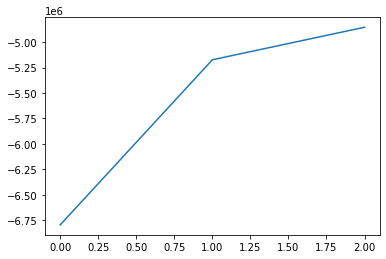

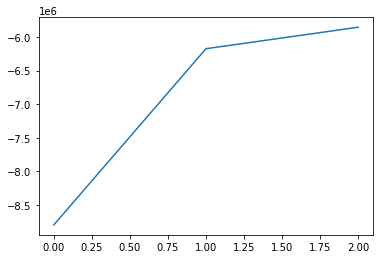

In [168]:
#Plotting the likelihood 

plt.plot(like_music)
plt.show()
plt.plot(like_speech)
plt.show()

In [143]:

no=5
count=0
for i in range(len(test_data)):
    
    
        fft_test=specto_test(mag_fft,test_data[i])
        
        lgmusic=compute_logLikelihood(fft_test,pi_music,musicmeanVectors,covariance_music,no)
        lgspeech=compute_logLikelihood(fft_test,pi_speech,speechmeanVectors,covariance_speech,no)
        
        if(lgmusic>lgspeech):
            if(i<=23):
                
                count=count+1
            
        else:
            if(i>=24):
                
                count=count+1
            


In [142]:
print("The error here is ",1-(count/48))

The error here is  0.22916666666666663


5 Mixtures with diagonal covariance matrix

In [125]:
X=fft_music
music_Data1=[]
music_Data2=[]
music_Data3=[]
music_Data4=[]
music_Data5=[]
for i in range(len(label_music)):
    if(label_music[i]==1):
        music_Data1.append(X[i])
    elif(label_music[i]==2):
        music_Data2.append(X[i])
    elif(label_music[i]==3):
        music_Data3.append(X[i])
    elif(label_music[i]==4):
        music_Data4.append(X[i])
    else:
        music_Data5.append(X[i])
music_Data1=np.array(music_Data1)
music_Data2=np.array(music_Data2)
music_Data3=np.array(music_Data3)
music_Data4=np.array(music_Data4)
music_Data5=np.array(music_Data5)
musicmeanVectors=mean_music
covariance_music=[]



covariance_music.append(np.diag(np.diag(cov_mat(music_Data1))))
covariance_music.append(np.diag(np.diag(cov_mat(music_Data2))))

covariance_music.append(np.diag(np.diag(cov_mat(music_Data3))))
covariance_music.append(np.diag(np.diag(cov_mat(music_Data4))))
covariance_music.append(np.diag(np.diag(cov_mat(music_Data5))))
covariance_music=np.array(covariance_music)
pi_music=[]
pi_music.append(len(music_Data1)/len(X))
pi_music.append(len(music_Data2)/len(X))
pi_music.append(len(music_Data3)/len(X))
pi_music.append(len(music_Data4)/len(X))
pi_music.append(len(music_Data5)/len(X))


38212
18223
34347
7355
21743


In [126]:
X=fft_speech
speech_Data1=[]
speech_Data2=[]
speech_Data3=[]
speech_Data4=[]
speech_Data5=[]
for i in range(len(label_speech)):
    if(label_speech[i]==1):
        speech_Data1.append(X[i])
    elif(label_speech[i]==2):
        speech_Data2.append(X[i])
    elif(label_speech[i]==3):
        speech_Data3.append(X[i])
    elif(label_speech[i]==4):
        speech_Data4.append(X[i])
    else:
        speech_Data5.append(X[i])
speech_Data1=np.array(speech_Data1)
speech_Data2=np.array(speech_Data2)
speech_Data3=np.array(speech_Data3)
speech_Data4=np.array(speech_Data4)
speech_Data5=np.array(speech_Data5)
speechmeanVectors=mean_speech
covariance_speech=[]



covariance_speech.append(np.diag(np.diag(cov_mat(speech_Data1))))
covariance_speech.append(np.diag(np.diag(cov_mat(speech_Data2))))

covariance_speech.append(np.diag(np.diag(cov_mat(speech_Data3))))
covariance_speech.append(np.diag(np.diag(cov_mat(speech_Data4))))
covariance_speech.append(np.diag(np.diag(cov_mat(speech_Data5))))
covariance_speech=np.array(covariance_speech)
pi_speech=[]
pi_speech.append(len(music_Data1)/len(X))
pi_speech.append(len(music_Data2)/len(X))
pi_speech.append(len(music_Data3)/len(X))
pi_speech.append(len(music_Data4)/len(X))
pi_speech.append(len(music_Data5)/len(X))


8589
6407
36858
26438
41588


In [127]:
like_music=[compute_logLikelihood(fft_music,pi_music,musicmeanVectors,covariance_music,no)]
like_speech=[compute_logLikelihood(fft_speech,pi_speech,speechmeanVectors,covariance_speech,no)]

In [129]:
c=0
while True:
    no=5
    c=c+1
    if(c==3):
        break
    z_music=np.zeros((len(fft_music), no))
    z_speech=np.zeros((len(fft_speech), no))
    ############################ E step ###########################
    for n in range(len(fft_music)):
            for k in range(no):
                z_music[n][k] = pi_music[k] * multivariate(fft_music[n], musicmeanVectors[k], covariance_music[k])
                z_music[n][k] /= sum([pi_music[j]*multivariate(fft_music[n], musicmeanVectors[j], covariance_music[j]) for j in range(no)])
    for n in range(len(fft_speech)):
            for k in range(no):
                z_speech[n][k] = pi_speech[k] * multivariate(fft_speech[n], speechmeanVectors[k], covariance_speech[k])
                z_speech[n][k] /= sum([pi_speech[j]*multivariate(fft_speech[n], speechmeanVectors[j], covariance_speech[j]) for j in range(no)])
    N_speech=np.sum(z_speech,axis=0)
    N_music=np.sum(z_music,axis=0)
    
    ####################################### M step ################################
    
    #musicmeanVectors=np.zeros([no,len(fft_music[0])])
    #speechmeanvectors=np.zeros([no,len(fft_speech[0])])
    for k in range(no):
        for n in range(len(fft_music)):
            musicmeanVectors[k] += z_music[n][k] * fft_music[n] 
        musicmeanVectors[k] = (1/N_music[k])*musicmeanVectors[k]
    for k in range(no):
        for n in range(len(fft_speech)):
            speechmeanVectors[k] += z_speech[n][k] * fft_speech[n] 
        speechmeanVectors[k] = (1/N_speech[k])*speechmeanVectors[k] 
        
        
    #covariance_music = [np.zeros((len(fft_music[0]), len(fft_music[0]))) for k in range(no)]
    #covariance_speech = [np.zeros((len(fft_music[0]), len(fft_music[0]))) for k in range(no)]

                # Updating the covariance matrices
    for k in range(no):

        new_X=(fft_music-musicmeanVectors[k]).T

        covariance_music[k]=np.diag(np.diag(np.dot(z_music[:,k]*new_X,new_X.T)))
        covariance_music[k] = 1/N_music[k]*covariance_music[k] 
        

    for k in range(no):
        new_X_speech=(fft_speech-speechmeanVectors[k]).T
        covariance_speech[k]=np.diag(np.diag(np.dot(z_speech[:,k]*new_X_speech,new_X_speech.T)))
        covariance_speech[k] = 1/N_speech[k]*covariance_speech[k] 
        
        
        
    for i in range(no):
        pi_music[i]=(N_music[i]/len(fft_music))
    for i in range(no):
        pi_speech[i]=(N_speech[i]/len(fft_speech))
    l1=compute_logLikelihood(fft_music,pi_music,musicmeanVectors,covariance_music,no)
    like_music.append(l1)
    l2=compute_logLikelihood(fft_speech,pi_speech,speechmeanVectors,covariance_speech,no)
    like_speech.append(l2)
   
   

Likelihood of music is 


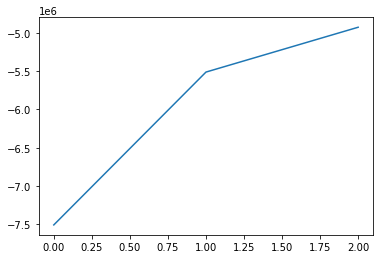

Likelihood of speech is 


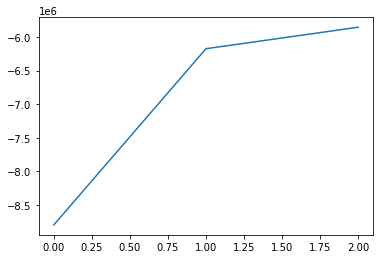

In [140]:
print("Likelihood of music is ")

plt.plot(like_music)
plt.show()

print("Likelihood of speech is ")

plt.plot(like_speech)
plt.show()


In [120]:
no=5

count=0
for i in range(len(test_data)):
    
    
        fft_test=specto_test(mag_fft,test_data[i])
        
        lgmusic=compute_logLikelihood(fft_test,pi_music,musicmeanVectors,covariance_music,no)
        lgspeech=compute_logLikelihood(fft_test,pi_speech,speechmeanVectors,covariance_speech,no)
        
        if(lgmusic>lgspeech):
            if(i<=23):
                #print("music")
                count=count+1
            
        else:
            if(i>=24):
                #print("speech")
                count=count+1
            
print(count/48)

0.8958333333333334


In [122]:
print("The error rate is ",(1-count/48))

The error rate is  0.10416666666666663


The Error Rate at 2 Mixture with diagonal covariance is 17 %.

The Error Rate at 2 Mixture with full covariance is 2 %

The Error Rate at 5 Mixture with full covariance is 23 %

The Error Rate at 5 Mixture with diagonal covariance is 10 %

In case of full covariance prone to overfitting on small datasets and does not perform well to held out on test data.Similarily the case with number the increase in the number of mixtures it might perform well on training data but overfit on test data.